# An example showing how to generate bootstrapped error bars.

In [1]:
import os
import sys
import time
import json

import pygsti
from pygsti.modelpacks.legacy import std1Q_XYI

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get a GST estimate (similar to Tutorial 0)

# 1) get the target Model
target_model = std1Q_XYI.target_model()

# 2) get the building blocks needed to specify which operation sequences are needed
prep_fiducials, meas_fiducials = std1Q_XYI.prepStrs, std1Q_XYI.effectStrs
germs = std1Q_XYI.germs
maxLengths = [1,2,4,8,16]

# 3) generate "fake" data from a depolarized version of target_model
mdl_datagen = target_model.depolarize(op_noise=0.1, spam_noise=0.001)
listOfExperiments = pygsti.construction.create_lsgst_circuits(
    target_model, prep_fiducials, meas_fiducials, germs, maxLengths)
ds = pygsti.construction.simulate_data(mdl_datagen, listOfExperiments, nSamples=1000,
                                            sampleError="binomial", seed=1234)


results = pygsti.run_stdpractice_gst(ds, target_model, prep_fiducials, meas_fiducials,
                                    germs, maxLengths, modes="TP")
estimated_model = results.estimates['TP'].models['stdgaugeopt']

--- Circuit Creation ---
   1282 sequences created
   Dataset has 1282 entries: 1282 utilized, 0 requested sequences were missing
-- Std Practice:  Iter 1 of 1  (TP) --: 
  --- Iterative MLGST: [##################################################] 100.0%  1282 operation sequences ---
  Iterative MLGST Total Time: 7.2s


## Parametric Bootstrapping
Here we do parametric bootstrapping, as indicated by the 'parametric' argument below.
The output is eventually stored in the "mean" and "std" Models, which hold the mean and standard deviation values of the set of bootstrapped models (after gauge optimization).  It is this latter "standard deviation Model"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.


In [3]:
#The number of simulated datasets & models made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numGatesets=10

param_boot_models = pygsti.drivers.make_bootstrap_models(
                        numGatesets, ds, 'parametric', prep_fiducials, meas_fiducials, germs, maxLengths,
                        inputModel=estimated_model, startSeed=0, returnData=False,
                        verbosity=2)

Creating DataSets: 
0 Generating parametric dataset.
1 Generating parametric dataset.
2 Generating parametric dataset.
3 Generating parametric dataset.
4 Generating parametric dataset.
5 Generating parametric dataset.
6 Generating parametric dataset.
7 Generating parametric dataset.
8 Generating parametric dataset.
9 Generating parametric dataset.
Creating Models: 
Running MLGST Iteration 0 
--- Circuit Creation ---
   1282 sequences created
   Dataset has 1282 entries: 1282 utilized, 0 requested sequences were missing
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.244653976670047
  1.192830953128653
  0.9689326363609111
  0.9189157715091224
  0.07422658287182586
  0.011606078537692615
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.244164062089174
  1.169453419312999
  0.9475116980891475
  0.9403516426340927
  2.709096598579531e-16
  1.7684881472925075e-16
  
--- Iterative MLGST: Iter 1 of 5  92 operation sequences ---: 
  --- 

  2*Delta(log(L)) = 136.6
  Iteration 2 took 0.4s
  
--- Iterative MLGST: Iter 3 of 5  450 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 417.539 (450 data params - 31 model params = expected mean of 419; p-value = 0.510963)
  Completed in 0.7s
  2*Delta(log(L)) = 418.44
  Iteration 3 took 0.9s
  
--- Iterative MLGST: Iter 4 of 5  862 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 805.317 (862 data params - 31 model params = expected mean of 831; p-value = 0.732436)
  Completed in 1.0s
  2*Delta(log(L)) = 806.567
  Iteration 4 took 1.3s
  
--- Iterative MLGST: Iter 5 of 5  1282 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 1185.16 (1282 data params - 31 model params = expected mean of 1251; p-value = 0.907703)
  Completed in 1.7s
  2*Delta(log(L)) = 1186.39
  Iteration 5 took 2.1s
  
  Switching to ML objective (last iteration)
  --- MLGST ---
    Maximum log(L) = 593.158 below upper bound of -2.1362e+06
      2*D

  4.244825840755222
  1.1607854217596698
  0.9292803921438999
  0.8958478552912302
  0.03648710217525403
  0.005481843557321346
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.244164062089174
  1.169453419312999
  0.9475116980891475
  0.9403516426340927
  2.709096598579531e-16
  1.7684881472925075e-16
  
--- Iterative MLGST: Iter 1 of 5  92 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 61.4652 (92 data params - 31 model params = expected mean of 61; p-value = 0.45923)
  Completed in 0.4s
  2*Delta(log(L)) = 61.3186
  Iteration 1 took 0.4s
  
--- Iterative MLGST: Iter 2 of 5  168 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 126.314 (168 data params - 31 model params = expected mean of 137; p-value = 0.733237)
  Completed in 0.3s
  2*Delta(log(L)) = 126.31
  Iteration 2 took 0.4s
  
--- Iterative MLGST: Iter 3 of 5  450 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 408.23 (450 data para

In [4]:
gauge_opt_pboot_models = pygsti.drivers.gauge_optimize_model_list(param_boot_models, estimated_model,
                                                                 plot=False) #plotting support removed w/matplotlib

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 1.0


In [5]:
pboot_mean = pygsti.drivers.to_mean_model(gauge_opt_pboot_models, estimated_model)
pboot_std  = pygsti.drivers.to_std_model(gauge_opt_pboot_models, estimated_model)

#Summary of the error bars
print("Parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:") 
print(pboot_std['rho0'], end='\n\n')
print("Error in effect vecs:")
print(pboot_std['Mdefault'], end='\n\n')
print("Error in Gi:")
print(pboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(pboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(pboot_std['Gy'])

Parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
TPSPAMVec with dimension 4
 0.71   0   0   0


Error in effect vecs:
TPPOVM with effect vectors:
0: FullSPAMVec with dimension 4
   0   0   0   0

1: ComplementSPAMVec with dimension 4
 1.41   0   0   0



Error in Gi:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gy:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0



## Non-parametric Bootstrapping
Here we do non-parametric bootstrapping, as indicated by the 'nonparametric' argument below.
The output is again eventually stored in the "mean" and "std" Models, which hold the mean and standard deviation values of the set of bootstrapped models (after gauge optimization).  It is this latter "standard deviation Model"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.

(Technical note: ddof = 1 is by default used when computing the standard deviation -- see numpy.std -- meaning that we are computing a standard deviation of the sample, not of the population.)

In [6]:
#The number of simulated datasets & models made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numModels=10

nonparam_boot_models = pygsti.drivers.make_bootstrap_models(
                          numModels, ds, 'nonparametric', prep_fiducials, meas_fiducials, germs, maxLengths,
                          targetModel=estimated_model, startSeed=0, returnData=False, verbosity=2)

Creating DataSets: 
0 Generating non-parametric dataset.
1 Generating non-parametric dataset.
2 Generating non-parametric dataset.
3 Generating non-parametric dataset.
4 Generating non-parametric dataset.
5 Generating non-parametric dataset.
6 Generating non-parametric dataset.
7 Generating non-parametric dataset.
8 Generating non-parametric dataset.
9 Generating non-parametric dataset.
Creating Models: 
Running MLGST Iteration 0 
--- Circuit Creation ---
   1282 sequences created
   Dataset has 1282 entries: 1282 utilized, 0 requested sequences were missing
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.244845695931912
  1.180285364189147
  0.9862995636431281
  0.902101822920102
  0.09233562824970798
  0.06946279872379223
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.244164062089174
  1.169453419312999
  0.9475116980891475
  0.9403516426340927
  2.709096598579531e-16
  1.7684881472925075e-16
  
--- Iterative MLGST: Iter 1 of 

  
--- Iterative MLGST: Iter 3 of 5  450 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 858.545 (450 data params - 31 model params = expected mean of 419; p-value = 0)
  Completed in 0.7s
  2*Delta(log(L)) = 859.868
  Iteration 3 took 0.8s
  
--- Iterative MLGST: Iter 4 of 5  862 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 1692.02 (862 data params - 31 model params = expected mean of 831; p-value = 0)
  Completed in 1.3s
  2*Delta(log(L)) = 1694.63
  Iteration 4 took 1.8s
  
--- Iterative MLGST: Iter 5 of 5  1282 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 2494.42 (1282 data params - 31 model params = expected mean of 1251; p-value = 0)
  Completed in 2.2s
  2*Delta(log(L)) = 2497.55
  Iteration 5 took 2.6s
  
  Switching to ML objective (last iteration)
  --- MLGST ---
    Maximum log(L) = 1248.61 below upper bound of -2.13547e+06
      2*Delta(log(L)) = 2497.23 (1282 data params - 31 model params = expected

  0.03235959131326644
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.244164062089174
  1.169453419312999
  0.9475116980891475
  0.9403516426340927
  2.709096598579531e-16
  1.7684881472925075e-16
  
--- Iterative MLGST: Iter 1 of 5  92 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 186.944 (92 data params - 31 model params = expected mean of 61; p-value = 1.04361e-14)
  Completed in 0.3s
  2*Delta(log(L)) = 187.248
  Iteration 1 took 0.4s
  
--- Iterative MLGST: Iter 2 of 5  168 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 361.082 (168 data params - 31 model params = expected mean of 137; p-value = 0)
  Completed in 0.4s
  2*Delta(log(L)) = 361.613
  Iteration 2 took 0.5s
  
--- Iterative MLGST: Iter 3 of 5  450 operation sequences ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 916.064 (450 data params - 31 model params = expected mean of 419; p-value = 0)
  Completed in 0.8s
  2*Delta(log(L)) = 918.454
 

In [7]:
gauge_opt_npboot_models = pygsti.drivers.gauge_optimize_model_list(nonparam_boot_models, estimated_model,
                                                                 plot=False) #plotting removed w/matplotlib

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 1.0


In [8]:
npboot_mean = pygsti.drivers.to_mean_model(gauge_opt_npboot_models, estimated_model)
npboot_std  = pygsti.drivers.to_std_model(gauge_opt_npboot_models, estimated_model)

#Summary of the error bars
print("Non-parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:")
print(npboot_std['rho0'], end='\n\n')
print("Error in effect vecs:")
print(npboot_std['Mdefault'], end='\n\n')
print("Error in Gi:")
print(npboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(npboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(npboot_std['Gy'])

Non-parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
TPSPAMVec with dimension 4
 0.71   0   0   0


Error in effect vecs:
TPPOVM with effect vectors:
0: FullSPAMVec with dimension 4
   0   0   0   0

1: ComplementSPAMVec with dimension 4
 1.41   0   0   0



Error in Gi:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gy:
TPDenseOp with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0



Text(0.5,1,'Scatter plot comparing param vs. non-param bootstrapping error bars.')

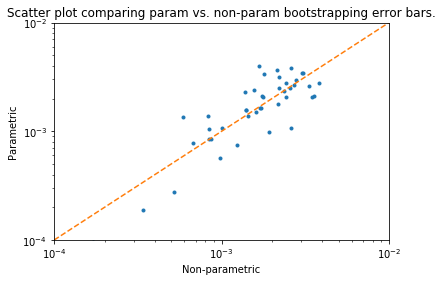

In [9]:
loglog(npboot_std.to_vector(),pboot_std.to_vector(),'.')
loglog(np.logspace(-4,-2,10),np.logspace(-4,-2,10),'--')
xlabel('Non-parametric')
ylabel('Parametric')
xlim((1e-4,1e-2)); ylim((1e-4,1e-2))
title('Scatter plot comparing param vs. non-param bootstrapping error bars.')